<h1>Hemispherical FP cavity</h1>

<h3>1)Radius of curvature vs Beam Radius<br />
2)Radius of curvature vs Stability<br />
3)Free Spectral Range<br />
4)Finesse<br />
5)Frequency vs Power circ/refl <br />

</h3>

Radius of curvatures:
ITM = 0 (infinity)
ETM = 10m (Rcx,Rcy)

Length of cavity: 
scav = 10m

Finesse = 446.208

In [33]:

from pykat import finesse        
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
import scipy.signal

%matplotlib inline               

pykat.init_pykat_plotting(dpi=90)



In [34]:
basecode = """
l L0 1 0 n0
s s0 0 n0 nITM1

m1 ITM 0.014 0 0 nITM1 nITM2
s scav 10 nITM2 nETM1
m1 ETM 0 0 0 nETM1 nETM2


lambda 1064n
const w0 0.003
const zr 26.5
attr ITM Rc 0
attr ETM Rcx 10.00001
attr ETM Rcy 10.00001

cav FP ITM nITM2 ETM nETM1


xaxis ETM Rcx lin 11 50 3000
func Rc2 = $x1
put ETM Rcy $Rc2



noplot Rc2
"""

In [35]:
basekat = finesse.kat() 
basekat.verbose = 1
basekat.parse(basecode)

<h2>Radius of curvature vs Beam Radius</h2>

--------------------------------------------------------------
Running kat - Started at 2021-06-08 14:06:49.651559
Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 0.0930691 seconds


100% | ETA:  0:00:00 | Calculating                                             

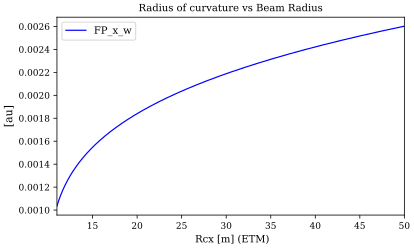

In [36]:
kat = basekat.deepcopy()
kat.parse("""

cp FP x w

""")
out = kat.run()
out.plot(title="Radius of curvature vs Beam Radius")

<h2>Radius of curvature vs Stability</h2>

--------------------------------------------------------------
Running kat - Started at 2021-06-08 14:06:51.078371
Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 0.0921137 seconds


100% | ETA:  0:00:00 | Calculating                                             

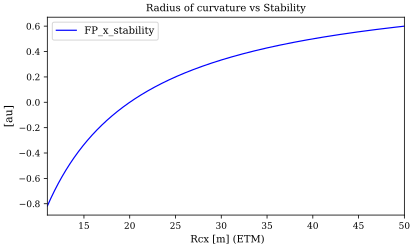

In [37]:
kat_a = basekat.deepcopy()
kat_a.parse("""

cp FP x stability
""")
out_a = kat_a.run()
out_a.plot(title="Radius of curvature vs Stability")

<h2>Free Spectral Range</h2>

--------------------------------------------------------------
Running kat - Started at 2021-06-08 14:06:53.835671
Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 0.0940206 seconds


100% | ETA:  0:00:00 | Calculating                                             

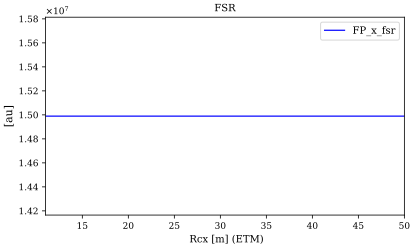

In [38]:
kat_b = basekat.deepcopy()
kat_b.parse("""

cp FP x fsr

""")
out_b = kat_b.run()
out_b.plot(title="FSR")

<h2>Finesse</h2>

--------------------------------------------------------------
Running kat - Started at 2021-06-08 14:06:55.808421
Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 0.0946789 seconds


100% | ETA:  0:00:00 | Calculating                                             

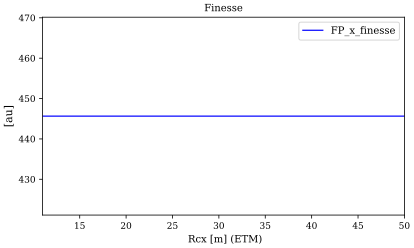

In [39]:
kat_c = basekat.deepcopy()
kat_c.parse("""

cp FP x finesse
""")
out_c = kat_c.run()
out_c.plot(title="Finesse")

<h2>Frequency vs Power circ/refl</h2>


Removed existing object 'xaxis' of type <class
'pykat.commands.xaxis'> to add line 'xaxis L0 f lin 0 40M
5000'

--------------------------------------------------------------
Running kat - Started at 2021-06-08 14:06:59.329721
Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 0.165411 seconds


100% | ETA:  0:00:00 | Calculating                                             

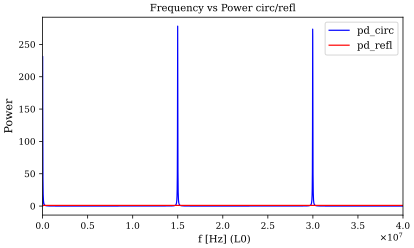

In [40]:
kat_d = basekat.deepcopy()
kat_d.parse("""
#detectors
retrace force


pd pd_refl nITM1
pd pd_circ nETM1

xaxis L0 f lin 0 40M 5000

""")
out_d = kat_d.run()
out_d.plot(['pd_refl','pd_circ'],ylabel="Power",title="Frequency vs Power circ/refl")